# HW#1 Perceptron

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 Perceptron 구현입니다.




#1. Perceptron Learning Algorithm
Perceptron은 Linearly separable data를 Classification 할 수 있는 알고리즘입니다. 이번 파트에서는 Perceptron을 한번 구현해 봅시다.

# 1.1 - Package import

먼저 과제에 필요한 package를 import 합니다.
- [numpy](www.numpy.org)는 파이썬에서 행렬 연산을 위한 핵심 라이브러리입니다.
- [matplotlib](http://matplotlib.org) 파이썬에서 plot을 위한 라이브러리입니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##1.2 - Linearly separable data generation
2차원의 Linearly separable data인 X와 Label Y를 만들고 plot해보세요. Lineary separable이라는 말은 직선을 경계로 나눌 수 있다는 뜻입니다.


1. 먼저 X를 만들어 봅시다. X는 2차원의 N개의 점으로 이루어져 있습니다.. 즉 X는 N x 2 차원의 행렬입니다. 본 문제에서는 $N=100$으로 가정합시다. `np.random.rand()` 함수를 이용하여 100 X 2 행렬인 X를 만들어 보세요.

$$X=\begin{bmatrix} x_1^{(1)}& x_2^{(1)}\\ x_1^{(2)}&x_2^{(2)} \\ \vdots&\vdots \\ x_1^{(N)}&x_2^{(N)}\end{bmatrix}$$


2. 이번에는 Label 정보를 가지고 있는 Y를 만들어보세요.  여기서는 $x_2=3x_1-1$이라는 선을 경계로 $x_2 > 3x_1-1$이면 1이라는 값을 갖고, 그렇지 않으면 -1이라는 값을 가지도록 합시다. N개의 data에 대한 라벨을 가지기 때문에 Y는 N x 1 차원의 행렬입니다. 이 문제에서는 100 x 1이 될 것입니다.

$$Y=\begin{bmatrix} y^{(1)}\\ y^{(2)}\\ \vdots\\ y^{(N)}\end{bmatrix}$$


**Exercise:** X와 Y를 만들고 출력해보세요.


In [68]:
### START CODE HERE ###

### END CODE HERE ###
assert X.shape==(100,2)
assert Y.shape==(100,1)

100

Text(0, 0.5, 'x2')

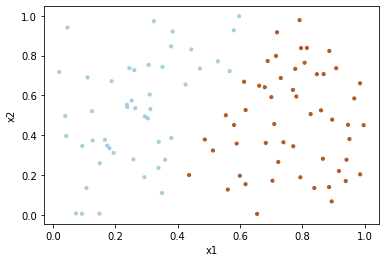

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=10, cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

##1.3 - Perceptron implementation
`perceptron()` 함수를 구현해봅시다. 
먼저 수업 시간에 배웠듯이 편의상 모든 X 데이터에 $x_0=1$이 추가되어 있는 X_ones를 만들고 우리가 찾아야할 weight 행렬을 $w$라고 정의합니다. 따라서 X_ones의 차원은 N x 3이 될 것이고 $w=[w_0, w_1, w_2]$가 될 것입니다.


perceptron은 다음과 같은 과정으로 weight를 찾아냅니다.

> for each training case

>&nbsp;&nbsp;&nbsp;&nbsp; $z^{(i)} = \mathbf{w}^T\mathbf{Xones}$

>&nbsp;&nbsp;&nbsp;&nbsp;if $z^{(i)}*y^{(i)} \leq 0$

>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{w} = \mathbf{w} + \mathbf{Xones}^{(i)} * y^{(i)}$

위 과정을 w가 변하지 않을 때까지 반복합니다. 본 과제에서는 편의상 충분히 큰 횟수인 100회를 반복하면 변하지 않는다고 가정하겠습니다.

**Exercise:** Perceptron 알고리즘 구현해보세요.


In [69]:
def perceptron(X,Y):
  X_ones=np.concatenate((np.ones((len(X),1)),X), axis=1)
  w=np.zeros(X_ones.shape[1])

  epochs = 100
  for ep in range(epochs):

  ### START CODE HERE ###

  ### END CODE HERE ###

  return w


In [ ]:
w=perceptron(X,Y)
assert w.shape[0]==3
print(w)

[-1.          2.75983009 -0.78594882]


##1.4 - Visualization
우리가 찾은 weight가 정말 data를 잘 구분하는지 살펴보겠습니다.
$x_0=1$이기 때문에 prediction인 $z$는 다음과 같은 식을 만족합니다.

$$z=w_0x_0+w_1x_1+w_2x_2=w_0+w_1x_1+w_2x_2$$

이 때 z=0을 경계로 데이터가 나누어지기 때문에 $(x_1,x_2)$은 다음과 같은 식을 만족합니다.

$$x_2 = -\frac{w_1}{w_2}x_1-\frac{w_0}{w_2} $$


아래 코드를 실행하여 데이터가 잘 나누어지는지 살펴보세요.

Text(0, 0.5, 'x2')

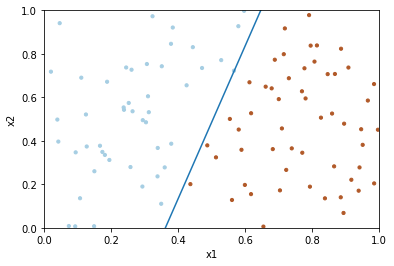

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=10, cmap=plt.cm.Paired)
plt.plot([0,1],[-w[0]/w[2],-w[0]/w[2]-w[1]/w[2]])
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('x1')
plt.ylabel('x2')

##1.5 (optional) Multi-class perceptron

만약 class가 여러개일 때 perceptron으로 분류하려면 어떻게 해야 할까요?
예를 들어 class label이 3가지인 경우, 즉 1,2,3인 경우를 생각해봅시다.

첫번째 방법은 one vs rest 방법입니다.

*   1번라벨 vs 2번라벨과 3번라벨  -> Perceptron -> Line1
*   2번라벨 vs 1번라벨과 3번라벨  -> Perceptron -> Line2
*   3번라벨 vs 1번라벨과 2번라벨  -> Perceptron -> Line3

이렇게 Line 3개를 찾아서 그으면 3개의 클래스를 구분할 수 있습니다. 

두번째 방법으로는 one vs one 방법입니다.

*   1번라벨 vs 2번라벨  -> Perceptron -> Line1
*   2번라벨 vs 3번라벨  -> Perceptron -> Line2
*   3번라벨 vs 1번라벨  -> Perceptron -> Line3

이렇게 해서도 Line 3개를 찾을 수 있습니다.
Label이 3개인 데이터를 만들어서 perceptron을 실행하여 데이터를 분류하고 plot해보세요.


In [ ]:
### START CODE HERE ###

#### END CODE HERE ###

##1.6 (optional) 3D perceptron

우리는 2차원 데이터에 대한 Perceptron 알고리즘을 Visualization 해보았습니다. 만약 데이터가 3차원 혹은 그 이상이라면 어떻게 될까요?

Perceptron 알고리즘은 Linearly separable data라면 차원이 달라져도 구분이 가능합니다. 즉 위에서 구현한 Perceptron 함수를 그대로 사용할 수 있습니다.

3차원 데이터에 대해서 Perceptron이 동작함을 Visualization 해보세요. 아마 3차원 공간에 데이터들이 있고 평면으로 구분될 것입니다. Rotating 3d plot으로 그려 보시기 바랍니다.

In [ ]:
### START CODE HERE ###

#### END CODE HERE ###